
# Tercer Examen Parcial <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 A2023 Estadística 

Dr. Álvaro Eduardo Cordero Franco

Ismael Sandoval Aguilar 

20 de octubre de 2023 

#### Problemática

En la mayoría de las condiciones de preservación, es difícil encontrar ejemplares completos de Trilobites. La cabeza (cephalon) suelta es mucho más común. Por ello, es útil poder estimar el tamaño del cuerpo en función de medidas sobre la cabeza, estableciendo cuáles de ellas constituyen la mejor determinación del tamaño total. La siguiente tabla nos proporciona un conjunto de datos del tamaño (body length) y 2 variables que se utilizarán como predictoras Glabellar Length y Glabellar Width. 

<img src="tabla.png" style="width: 400px" class="center"/>

Obtenga o realice:
- Una ecuación de regresión lineal múltiple. 
- Las pruebas de hipótesis sobre ambas variables. 
- Grafique la variable de respuesta contra ambas variables e individualmente.
- Una matriz de correlación entre las variables. 
- Concluya.  

#### Preparación de datos

In [2]:
# Libraries
import numpy as np
import pandas as pd

In [3]:
# Dataset import
df = pd.read_csv('data.csv')

# Data cleaning and columm renaming 
df = df.dropna()

df = df.rename(columns = {
    'Body\nLength ( mm )': 'Body Length',
    'Glabellar\nLength ( mm )': 'Glabellar Length',
    'Glabellar\nWidth ( mm )': 'Glabellar Width'
})

df.head()

,Genus,Body Length,Glabellar Length,Glabellar Width
0,Acaste,23.14,3.50,3.77
1,Balizoma,14.32,3.97,4.08
2,Calymene,51.69,10.91,10.72
3,Ceraurus,21.15,4.90,4.69
4,Cheirurus,31.74,9.33,12.11


#### Ecuación de Regresión Lineal Múltiple

In [4]:
# Libraries 
import statsmodels.api as sm

El modelo constará de las siguientes variables dependientes e independientes:

- $X_1$: "Glabellar Length".
- $X_2$: "Glabellar Width".
- $Y$: "Body Length".

In [40]:
# Variables
x = df[['Glabellar Length', 'Glabellar Width']]
y = df['Body Length']

In [41]:
# Model creation
ln_model = sm.OLS(y, sm.add_constant(x)).fit()

In [42]:
# Results
t_results_dict = {
    '': ['b_0', 'b_1', 'b_2', 'R_2 ajustada'],
    'Coeficientes': [round(ln_model.params[0], 4),
                   round(ln_model.params[1], 4),
                   round(ln_model.params[2], 4),
                   # Note: the r-squared is already adjusted 
                   round(ln_model.rsquared_adj, 4)]
}

results_df = pd.DataFrame(t_results_dict, index = np.arange(4))
results_df

,,Coeficientes
0,b_0,4.0297
1,b_1,2.3425
2,b_2,1.1402
3,R_2 ajustada,0.7918


De modo que, de acuerdo a los resultados anteriores, la ecuación es:

$Y = 4.0297 + 2.3425X_1 + 1.1402X_2$

con un $R^2$ ajustada de $0.7918$.

#### Pruebas de hipótesis

Se desea contrastar las siguientes hipótesis:

- $H_0: \beta_1 = 0$ v.s. $H_1: \beta_1 \neq 0$
- $H_0: \beta_2 = 0$ v.s. $H_1: \beta_2 \neq 0$

Con un nivel de significancia $\alpha = 0.05$ 

In [8]:
# Results
t_results_dict = {
    '': ['b_0', 'b_1', 'b_2'],
    'p-valores': [round(ln_model.pvalues[0], 4),
                   round(ln_model.pvalues[1], 4),
                   round(ln_model.pvalues[2], 4)],
}

results_df = pd.DataFrame(t_results_dict, index = np.arange(3))
results_df

,,p-valores
0,b_0,0.3879
1,b_1,0.0181
2,b_2,0.3126


Ya que el p-valor asociado a la hipótesis nula del coeficiente $\beta_1$ es menor a $\alpha$, existe evidencia suficiente para rechazar la hipótesis nula. Nótese que el resto de las hipótesis nulas no se rechazan. Por otra parte, para verificar que los residuos del modelo sigan una distribución normal, utilizaremos el estadístico de prueba de Shapiro-Wilk:

${\displaystyle W={\left(\sum \limits _{i=1}^{n}a_{i}x_{(i)}\right)^{2} \over \sum \limits _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}}$

Donde se busca constrastar:

- $H_0: X \sim \mathcal{N}(\mu,\sigma^2)$ v.s. $H_1: X \nsim \mathcal{N}(\mu,\sigma^2)$

Con un nivel de significancia $\alpha = 0.05$.

In [24]:
# Library
from scipy.stats import shapiro

In [43]:
# Store the values of the residuals
residuals = ln_model.resid

# Conduct the Shapiro-Wilk test
round(shapiro(residuals).pvalue, 4)

0.7008

Ya que el p-valor es mayor a $\alpha$, no existe evidencia suficiente para rechazar $H_0$, es decir, es muy probable que los residuos sigan una distribución normal.

#### Gráficas

In [9]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import abline_plot

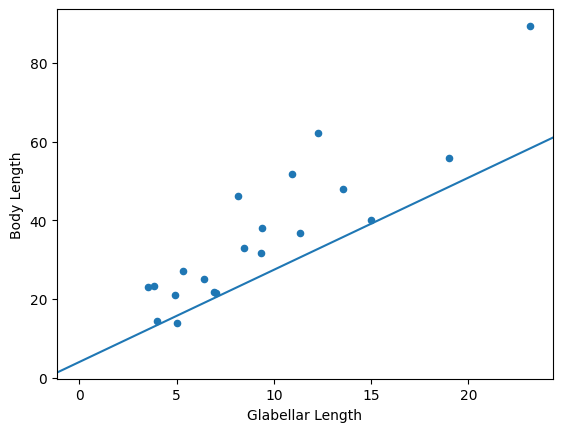

In [20]:
# Model parameters
p = ln_model.params

# Scatter-plot data
ax_1 = df.plot(x = 'Glabellar Length', y = 'Body Length', kind = 'scatter')

# Plot regression line
plt.axline(xy1 = (0, p[0]), slope = p[1])

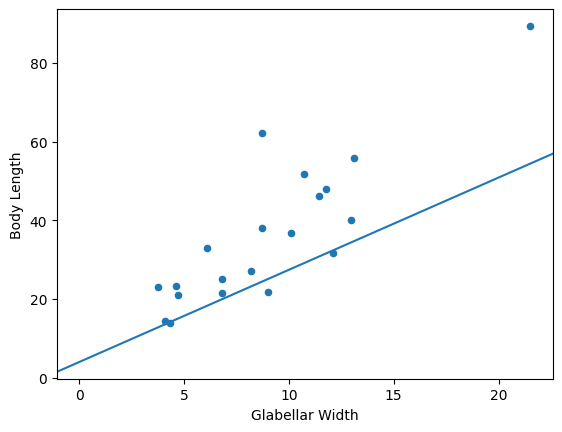

In [11]:
ax_2 = df.plot(x = 'Glabellar Width', y = 'Body Length', kind = 'scatter')
plt.axline(xy1 = (0, p[0]), slope = p[1])

#### Matriz de correlación

In [12]:
# Correlation matrix and plot
matrix_corr = df[['Glabellar Length', 'Body Length', 'Glabellar Width']].corr()
matrix_corr.style.background_gradient(cmap = 'coolwarm')

,Glabellar Length,Body Length,Glabellar Width
Glabellar Length,1.000000,0.895434,0.909182
Body Length,0.895434,1.000000,0.859479
Glabellar Width,0.909182,0.859479,1.000000


#### Conclusión

### Anexo


In [13]:
ln_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Body Length   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     37.12
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           6.27e-07
Time:                        22:51:37   Log-Likelihood:                -69.553
No. Observations:                  20   AIC:                             145.1
Df Residuals:                      17   BIC:                             148.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0297      4.547      0.886      0.388      -5.564      13.624
Glabellar Length     2.3425      0.896      2.615      0.018       0.453       4.232
Glabellar Width      1.1402      1.096      1.041      0.313      -1.171       3.452
==============================================================================
Omnibus:                        1.634   Durbin-Watson:                   2.465
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                0.915
Skew:                           0.524   Prob(JB):                        0.633
Kurtosis:                       2.965   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""